# Análise Exploratorio de Datos (EDA)
## Samuel Pedrosa

Imos traballar cun dataset que contén os datos relativos aos deportistas que aparecen la lista Forbes dende 1990 ata o 2020, xunto cos beneficios que obtuveron.

Enlace ao dataset: https://www.kaggle.com/parulpandey/forbes-highest-paid-athletes-19902019

### 1.Importamos as librerías que vamos empregar, cargamos o dataset e facemos unha primeira visualización

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #Este paquete hai que instalalo
import plotly.graph_objects as go

In [2]:
# Cargamos e visualizamos o dataset
deportistas = pd.read_csv("C:/Users/samuel.pedrosapedros/Downloads/Dataset_EDA/deportistas.csv",index_col=0)
deportistas.head(5)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


### 2.Comprobamos como é o dataset (Variables categóricas, cantidade de nulos, obtemos os datos estatisticos)

In [3]:
# Obtemos a información relativa ao dataset
deportistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [4]:
# Comprobamos os nulos que hai no Dataset
deportistas.isnull().sum()

Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [5]:
deportistas.describe()

,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


#### O máis relevante que podemos sacar de obter os datos estatísticos do dataset, é que a media das ganancias/beneficios dos deportistas é de 45,5M de $

### 3.Cambiamoslle o nome ás taboas que teñen o nome separado por espazos, para que sexa máis sinxelo traballar con elas e sustituimos os valores nulos.

In [6]:
# Renomeamos ás columnas que poden dar problemas
deportistas = deportistas.rename(columns={'Current Rank':'Rank_actual','Previous Year Rank':'Rank_anterior','earnings ($ million)':'beneficios'})
deportistas.head(5)

,Name,Nationality,Rank_actual,Rank_anterior,Sport,Year,beneficios
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [7]:
#Cambiamos a Upper todos os nomes de deportez, xa que hai algúns que se repiten e despois á hora de contar os deportes aparecen duas veces,
#cunha ca primeira letra en maiúscula e outra completamente en minúscula
deportistas["Sport"]=deportistas["Sport"].str.upper()

In [8]:
#Quitamos os valores nulos da columna Previous Year Rank
deportistas.Rank_anterior=deportistas.Rank_anterior.fillna('Descoñecido')
deportistas.head()

,Name,Nationality,Rank_actual,Rank_anterior,Sport,Year,beneficios
S.NO,,,,,,,
1,Mike Tyson,USA,1,Descoñecido,BOXING,1990,28.6
2,Buster Douglas,USA,2,Descoñecido,BOXING,1990,26.0
3,Sugar Ray Leonard,USA,3,Descoñecido,BOXING,1990,13.0
4,Ayrton Senna,Brazil,4,Descoñecido,AUTO RACING,1990,10.0
5,Alain Prost,France,5,Descoñecido,AUTO RACING,1990,9.0


Vemos como se distribuen agora os datos

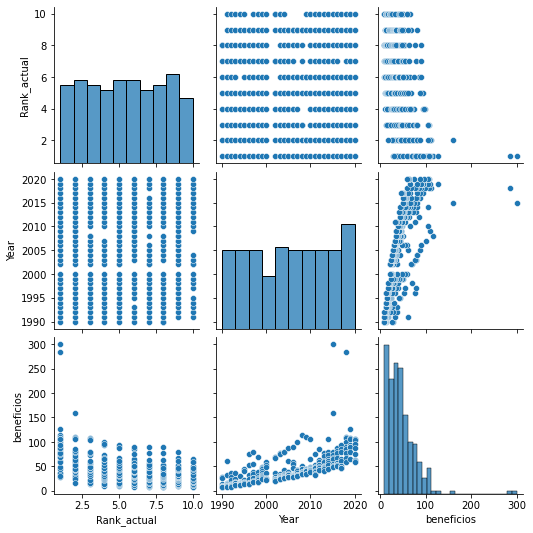

In [9]:
sns.pairplot(deportistas)

Comprobamos agora as correlacions

,Rank_actual,Year,beneficios
Rank_actual,1.000000,0.001600,-0.449052
Year,0.001600,1.000000,0.653866
beneficios,-0.449052,0.653866,1.000000


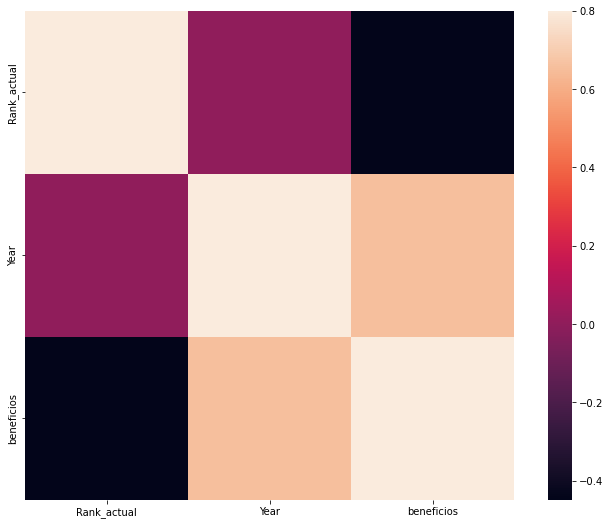

In [10]:
corrmat=deportistas.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square=True)
corrmat

Podemos ver que hai unha pequena correlación entre o ano e os beneficios

<AxesSubplot:xlabel='Year', ylabel='beneficios'>

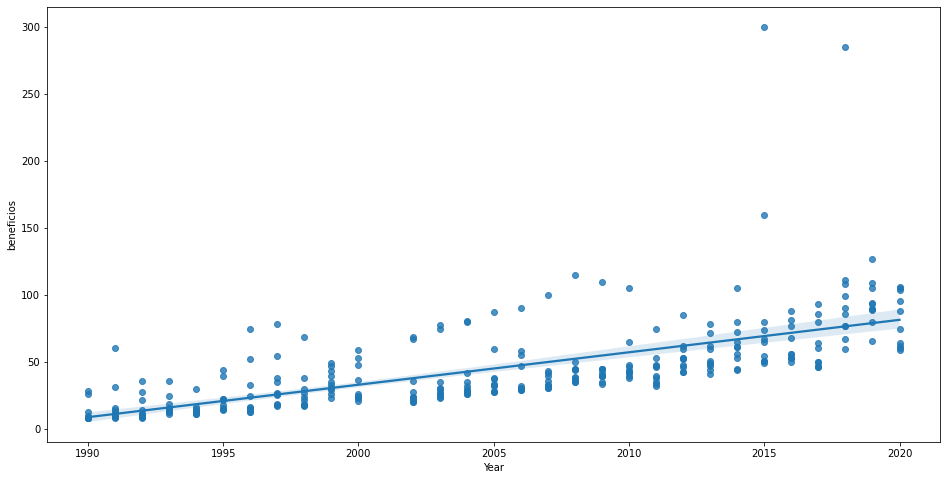

In [11]:
plt.figure(figsize=(16, 8))

sns.regplot(x='Year', y='beneficios', data=deportistas)

Representamos os datos da correlación

### 5.Comezamos a elaborar gráficas cos datos do dataset

#### En primeiro lugar imos pintar un gráfico para ver como foi a evolución dos dalarios dos deportistas ao longo do tempo dende 1990

<AxesSubplot:xlabel='Year', ylabel='beneficios'>

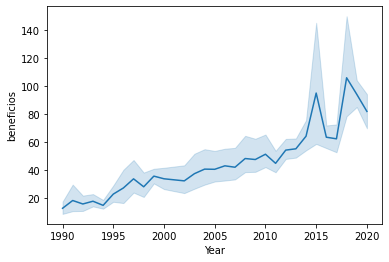

In [12]:
# Comprobamos a evolución dos salarios dos deportistas ao longo dos anos,
sns.lineplot(x='Year',y='beneficios',data=deportistas)

#### Podemos deducir que a medida que avanzou o tempo, os deportistas gañaban máis diñeiro, tendo os picos máximos en 2015 e entre 2018 e 2019, por último podemos ver como en 2020 reducironse os beneficios probablemente debido á pandemia por mor da Covid-19

In [13]:
# Ordenamos os deportistas por ganancias para ver se se corresponden ca gráfica anterior
ordenados=deportistas.sort_values('beneficios', ascending=False)
ordenados

,Name,Nationality,Rank_actual,Rank_anterior,Sport,Year,beneficios
S.NO,,,,,,,
242,Floyd Mayweather,USA,1,1,BOXING,2015,300.0
272,Floyd Mayweather,USA,1,>100,BOXING,2018,285.0
243,Manny Pacquiao,Philippines,2,11,BOXING,2015,160.0
282,Lionel Messi,Argentina,1,2,SOCCER,2019,127.0
172,Tiger Woods,USA,1,1,GOLF,2008,115.0
...,...,...,...,...,...,...,...
20,Sugar Ray Leonard,USA,10,6,GOLF,1991,8.5
30,Monica Seles,USA,10,12,TENNIS,1992,8.5
10,Evander Holyfield,USA,8,Descoñecido,BOXING,1990,8.1


#### Podemos apreciar que como di a gráfica anterior os salarios foron en aumento a medida que pasou o tempo, se ben polo medio pode haber algún que outro "pico" que non se vexa representado na gráfica xa que a media do ano completo pode ser máis pequena, como pode ser o caso de Tiger Woods en 2008

#### Agora vamos facer un top 10 cos deportistas con mais beneficios e en segundo lugar cos deportes que practican.

In [14]:
#Aquí creamos o top 10 de deportistas
top_ten=deportistas.sort_values('beneficios',ascending=False).head(10)
top_ten

,Name,Nationality,Rank_actual,Rank_anterior,Sport,Year,beneficios
S.NO,,,,,,,
242,Floyd Mayweather,USA,1,1,BOXING,2015,300.0
272,Floyd Mayweather,USA,1,>100,BOXING,2018,285.0
243,Manny Pacquiao,Philippines,2,11,BOXING,2015,160.0
282,Lionel Messi,Argentina,1,2,SOCCER,2019,127.0
172,Tiger Woods,USA,1,1,GOLF,2008,115.0
273,Lionel Messi,Argentina,2,3,SOCCER,2018,111.0
182,Tiger Woods,USA,1,1,GOLF,2009,110.0
283,Cristiano Ronaldo,Portugal,2,3,SOCCER,2019,109.0
274,Cristiano Ronaldo,Portugal,3,1,SOCCER,2018,108.0


#### Pintamos a gráfica dos deportistas ordenados por beneficios

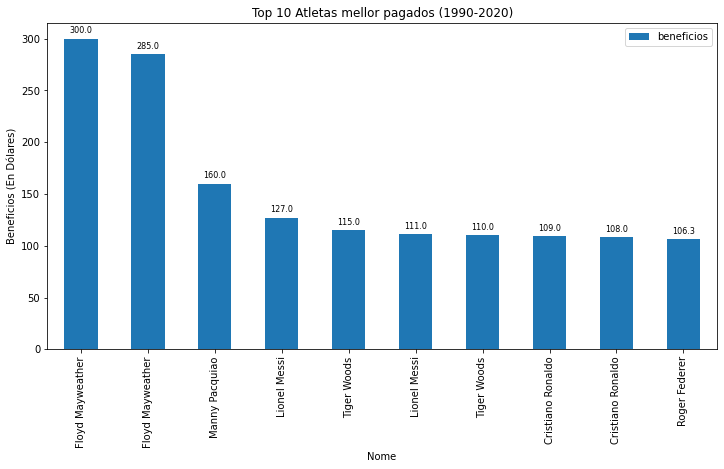

In [15]:
plot=top_ten.plot.bar(x='Name',y='beneficios',figsize=(12,6));
plt.title('Top 10 Atletas mellor pagados (1990-2020)');
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                   textcoords = 'offset points')
plt.ylabel('Beneficios (En Dólares)');
plt.xlabel('Nome');

#### E agora pintamos a mesma gráfica, pero cambiando o nome do deportista polo nome do deporte que practican

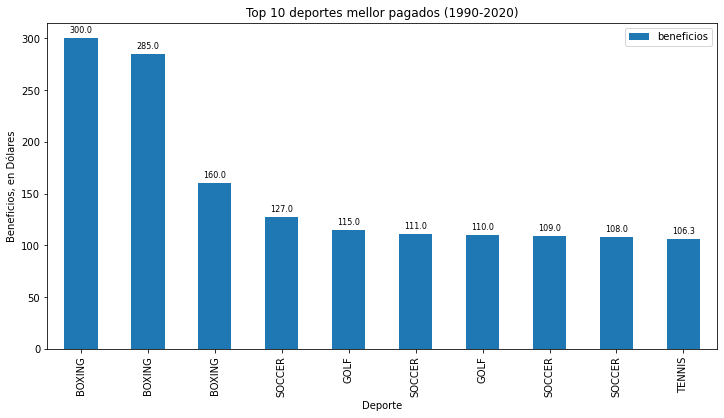

In [16]:
plot=top_ten.plot.bar(x='Sport',y='beneficios',figsize=(12,6));
plt.title('Top 10 deportes mellor pagados (1990-2020)');
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=8,xytext = (0, 8), 
                   textcoords = 'offset points')
plt.ylabel('Beneficios, en Dólares');
plt.xlabel('Deporte');

#### Como podemos ver, o boxeo é o deporte mellor pagado xunto co fútbol,golf e o tenis.

#### Agora vamos comprobar cales son os deportistas con máis aparicións na lista Forbes

In [17]:
#Primeiro vamos agrupalos e logo creamos un campo "Aparicións", onde estará o número de veces que ese deportista aparece na lista Forbes
deportistas_nome = deportistas.groupby(['Name'])
aparicions = deportistas_nome['Name'].count()\
                .reset_index(name='Aparicions')\
                .sort_values(['Aparicions'], ascending=0)
aparicions

,Name,Aparicions
52,Michael Jordan,19
78,Tiger Woods,19
43,Kobe Bryant,14
45,LeBron James,13
54,Michael Schumacher,13
...,...,...
57,Monica Seles,1
58,Muhammad Ali,1
26,Gary Sheffield,1
23,Emmit Smith,1


Na gráfica pintaremos os 20 deportistas con máis aparicions.

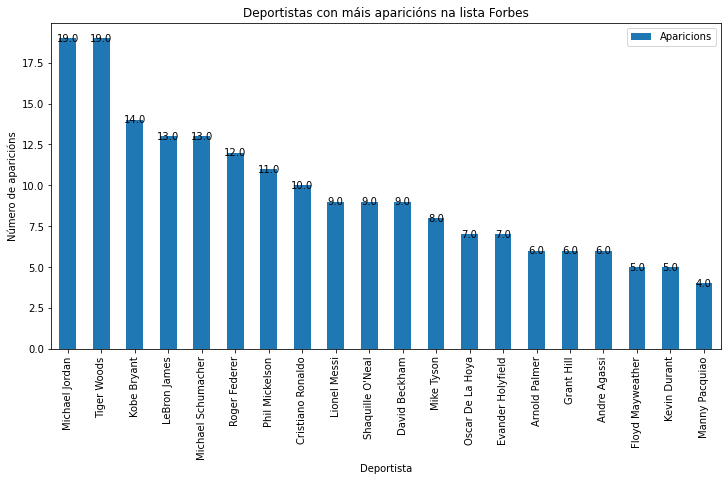

In [18]:
top20_aparicions=aparicions.head(20)
plot=top20_aparicions.plot.bar(x='Name',y='Aparicions',figsize=(12,6));
plt.title('Deportistas con máis aparicións na lista Forbes');
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.1f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center')
plt.ylabel('Número de aparicións');
plt.xlabel('Deportista');

Agora faremos o mesmo, pero en lugar de ser cos deportistas, cos deportes

In [19]:
#Contamos as aparicións de cada deporte no dataset
deportes=deportistas["Sport"].value_counts()
deportes

BASKETBALL                      81
BOXING                          46
GOLF                            44
SOCCER                          33
TENNIS                          23
AUTO RACING                     18
AMERICAN FOOTBALL               17
F1 RACING                        8
BASEBALL                         6
F1 MOTORSPORTS                   5
MOTORCYCLE GP                    4
NASCAR                           3
ICE HOCKEY                       3
NFL                              3
AUTO RACING (NASCAR)             2
AMERICAN FOOTBALL / BASEBALL     1
HOCKEY                           1
NBA                              1
CYCLING                          1
MMA                              1
Name: Sport, dtype: int64

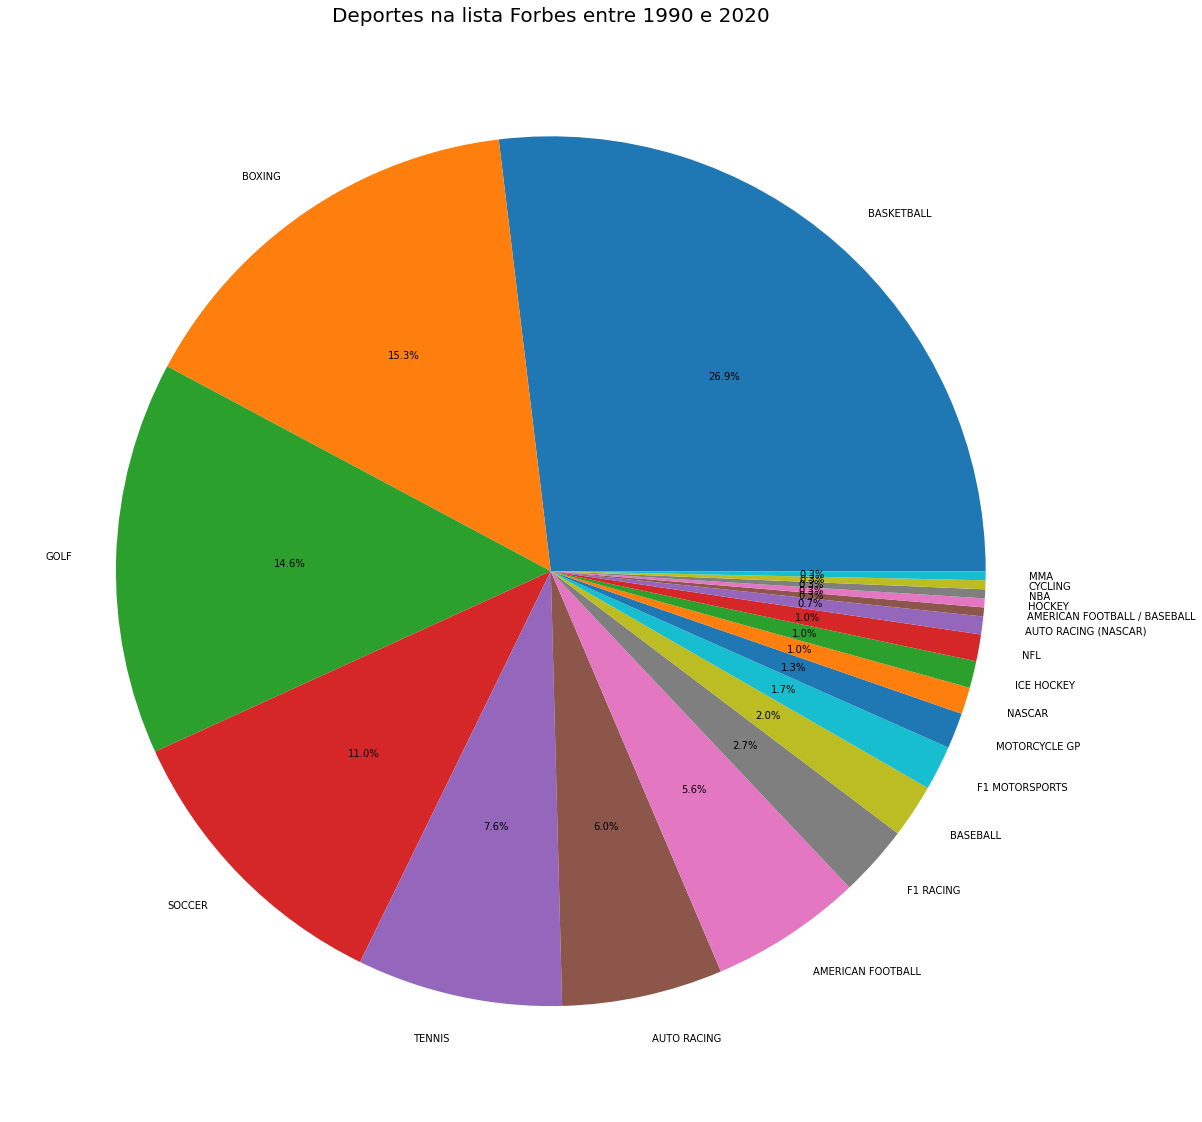

In [20]:
#Representamos os datos mum gráfico circular ou de sectores
plt.figure(figsize=(30,20))
plt.pie(list(deportistas["Sport"].value_counts()),labels=list(deportistas["Sport"].value_counts().keys()),autopct="%0.1f%%")
plt.title('Deportes na lista Forbes entre 1990 e 2020',fontsize=20)
plt.show()

#### Agora vamos a comprobar as nacionalidades que contan con maior representación

In [21]:
#Contamos as veces que aparece cada nacionalidade
nacionalidades=deportistas.Nationality.value_counts().to_frame()
nacionalidades

,Nationality
USA,206
UK,13
Germany,13
Switzerland,12
Portugal,10
Brazil,9
Argentina,9
Canada,6
Italy,4
Finland,3


Volvemos pintar os datos en un gráfico de sectores

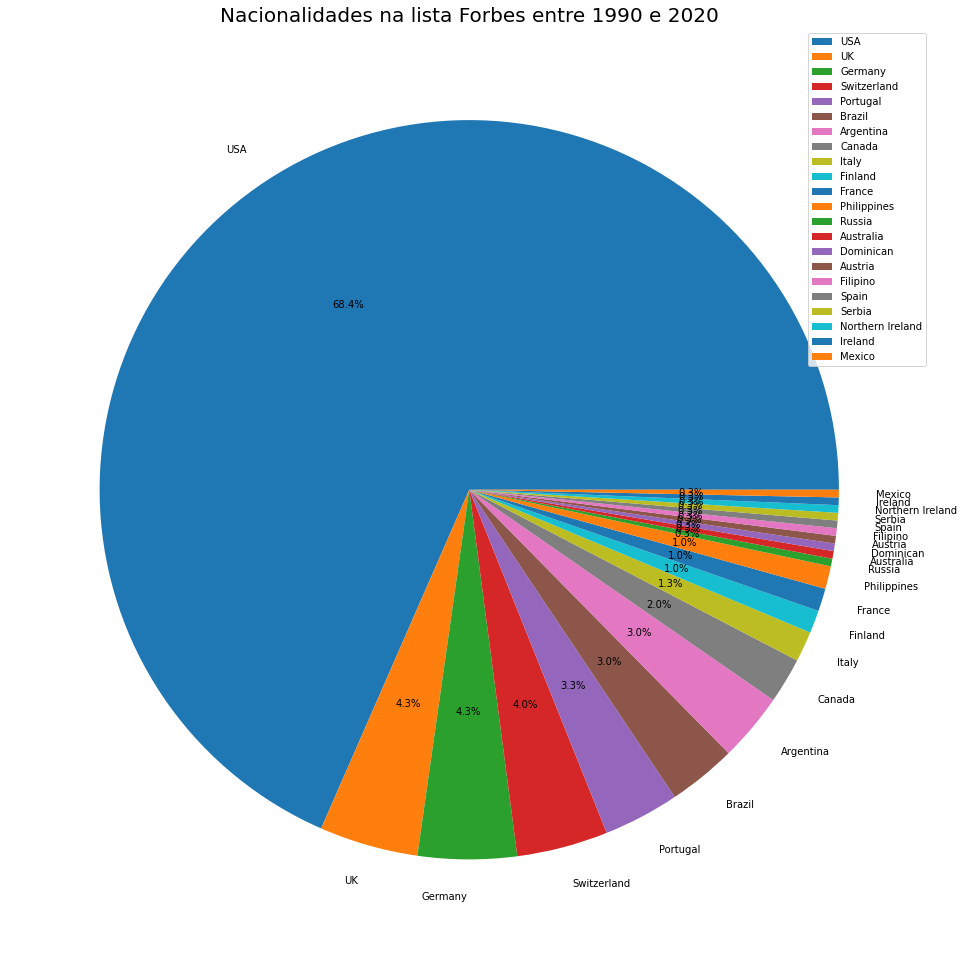

In [22]:
plt.figure(figsize=(20,17))
plt.pie(nacionalidades.values.flatten(),
        labels=nacionalidades.index.tolist(),
        autopct='%.1f%%')
plt.title('Nacionalidades na lista Forbes entre 1990 e 2020',fontsize=20)
plt.legend(nacionalidades.index)
plt.show()

### 6.Conclusións

A medida que pasaron os anos, os salarios dos deportistas foron aumentando de gran maneira.

O baloncesto é o deporte que máis aparece no dataset.

Estados Unidos é de largo o país que máis aparece no dataset.

O boxeo é o deporte mellor pagado, seguido do fútbol, baloncesto e motorsport.

Tiger Woods e Michael Jordan son os deportistas que máis veces salen na lista Forbes, con 19 aparicións cada un, seguidos de Kobe Bryant con 14 e Lebron James Michael Schumacher con 13.

A correlación entre os campos do dataset é moi limitada.

Hai deportes que aparecen varias veces ou mal nomeados, como por exemplo: "Soccer" e "soccer", "Basketball" e "basketball" ou "F1 RACING" e "F1 MOTORSPORT".

Ao tratarse dun dataset tan **"pequeno"** as posibilidades de traballar con el son máis limitadas que nun dataset máis grande.